<a href="https://colab.research.google.com/github/akiabe/coursera-dl-tf-in-practice/blob/master/C3W3_IMDB_Subwords_8K_with_1D_Convolutional_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQ99K8M/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQ99K8M/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQ99K8M/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
# Access the prelearned tokenizer which is trained on subwords
# tensorflow.org/datasets/api_docs/python/tfds/features/text/SubwordTextEncoder
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# Rondomly shuffles the elements of this dataset
train_dataset = train_dataset.shuffle(BUFFER_SIZE)

# Padding batches
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
# Build the Conv layer model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Training the model
NUM_EPOCHS = 10

history = model.fit(
    train_dataset,
    epochs=NUM_EPOCHS,
    validation_data=test_dataset
)

Epoch 1/10
391/391 [==============================] - 36s 93ms/step - loss: 0.4507 - accuracy: 0.7786 - val_loss: 0.3102 - val_accuracy: 0.8768
Epoch 2/10
391/391 [==============================] - 20s 50ms/step - loss: 0.2246 - accuracy: 0.9160 - val_loss: 0.3031 - val_accuracy: 0.8795
Epoch 3/10
391/391 [==============================] - 18s 45ms/step - loss: 0.1712 - accuracy: 0.9362 - val_loss: 0.3262 - val_accuracy: 0.8764
Epoch 4/10
391/391 [==============================] - 16s 41ms/step - loss: 0.1374 - accuracy: 0.9502 - val_loss: 0.3767 - val_accuracy: 0.8651
Epoch 5/10
391/391 [==============================] - 16s 42ms/step - loss: 0.1090 - accuracy: 0.9614 - val_loss: 0.4037 - val_accuracy: 0.8644
Epoch 6/10
391/391 [==============================] - 16s 40ms/step - loss: 0.0866 - accuracy: 0.9716 - val_loss: 0.5135 - val_accuracy: 0.8560
Epoch 7/10
391/391 [==============================] - 15s 38ms/step - loss: 0.0673 - accuracy: 0.9785 - val_loss: 0.5606 - val_accuracy:

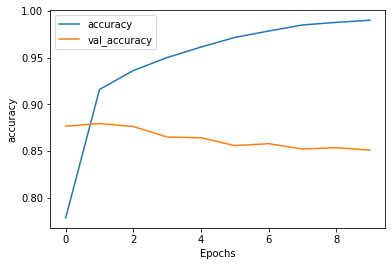

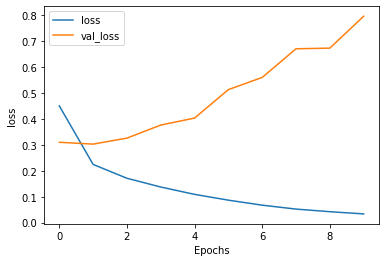

In [7]:
# Plot accuracy and loss
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')